In [2]:
import numpy as np, matplotlib.pyplot as plt
from scipy.special import jv
from numba import jit

## Exercises for Chapter 5
```
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%                                                                %%%
%%%     COMPUTATIONAL PHYSICS, M. NEWMAN, CHAPTER 5, EXERCISES     %%%
%%%                                                                %%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
```

### Exercise 5.1

In the on-line resources you will find a file called
\verb|velocities.txt|, which contains two columns of numbers, the first
representing time $t$ in seconds and the second the $x$-velocity in
 meters per second of a particle, measured once every second from time
$t=0$ to $t=100$.  The first few lines look like this:
```
0	0
1	0.069478
2	0.137694
3	0.204332
4	0.269083
5	0.331656
```
Write a program to do the following:

1. Read in the data and, using the trapezoidal rule, calculate from them
  the approximate distance traveled by the particle in the $x$ direction as
  a function of time.  See Section 2.4.3 on page 57 if you want a reminder
  of how to read data from a file.
2. Extend your program to make a graph that shows, on the same plot,
  both the original velocity curve and the distance traveled as a function
  of time.

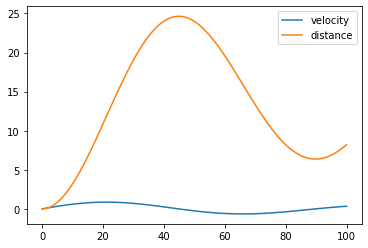

In [3]:
t,v = np.loadtxt('velocities.txt',unpack=True)
dt = t[1]-t[0]
plt.plot(t,v,label = 'velocity')
s = np.zeros(t.size)
for i in range(t.size):
    s[i] = (0.5*(v[0]+v[i]) + np.sum(v[:i]))*dt
plt.plot(t,s,label = 'distance')
plt.legend()

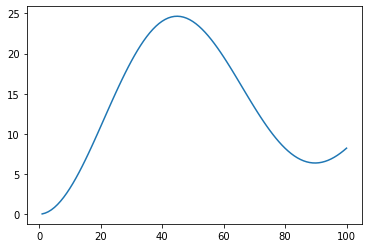

In [4]:
from scipy.integrate import cumtrapz
s = cumtrapz(v,t)
plt.plot(t[1:],s)

### Exercise 5.2



1. Write a program to calculate an approximate value for the integral
  $\int_0^2 (x^4 - 2x + 1) d x$ from Example 5.1, but using Simpson's
  rule with 10 slices instead of the trapezoidal rule.  You may wish to
  base your program on the trapezoidal rule program on
  page 142.
2. Run the program and compare your result to the known correct value of
  4.4.  What is the fractional error on your calculation?
3. Modify the program to use a hundred slices instead, then a thousand.
  Note the improvement in the result.  How do the results compare with
  those from Example 5.1 for the trapezoidal rule with the same numbers of
  slices?
 

In [22]:
def f(x):
    return x**4-2*x+1
def trapz(f,a,b,n):
    x = np.linspace(a,b,n+1)
    h = x[1] - x[0]
    s = 0.5*f(a)+0.5*f(b)
    s += np.sum(f(x[1:-1]))
    return s*h
def trapz1(a,b,n):
    h = (b-a)/n
    s = 0.5*f(a)+0.5*f(b)
    for i in range(1,n):
        s += f(a+i*h)
    return s*h
def SimpsonRule(f,a,b,n):
    x = np.linspace(a,b,2*n+1)
    h = x[1]-x[0]
    s = f(a)+f(b)
    s += 4*np.sum(f(x[1:-1:2]))
    s += 2*np.sum(f(x[2:-1:2]))
    return s*h/3
def SimpsonRule1(a,b,n):
    h = (b-a)/2/n
    s = f(a)+f(b)
    for i in range(1,2*n,2):
        s += 4*f(a+i*h)
    for i in range(2,2*n,2):
        s += 2*f(a+i*h)
    return s*h/3
a,b,n=0,2,10
print(trapz(f,a,b,n), SimpsonRule(f,a,b,n))

4.50656 4.400026666666668


### Exercise 5.3 

 Consider the integral
$$
E(x) = \int_0^x e^{-t^2} d t.
$$

1. Write a program to calculate $E(x)$ for values of $x$ from 0 to 3 in
  steps of 0.1.  Choose for yourself what method you will use for
  performing the integral and a suitable number of slices.
2. When you are convinced your program is working, extend it further to
  make a graph of $E(x)$ as a function of $x$.  If you want to remind
  yourself of how to make a graph, you should consult Section 3.1, starting
  on page 88.
 
Note that there is no known way to perform this particular integral
analytically, so numerical approaches are the only way forward.

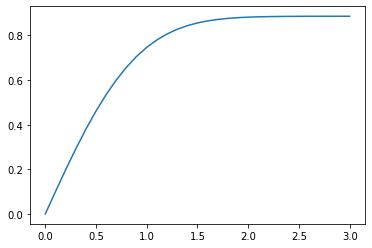

In [28]:
def f(x):
    return np.exp(-x*x)
x = np.arange(0,3.1,0.1)
y = np.empty(x.size)
for i,b in enumerate(x):
    y[i] = SimpsonRule(f,0,b,10)
plt.plot(x,y)

### Exercise 5.4

**The diffraction limit of a telescope**

 Our ability to resolve detail in astronomical observations is
limited by the diffraction of light in our telescopes.  Light from stars
can be treated effectively as coming from a point source at infinity.  When
such light, with wavelength $\lambda$, passes through the circular aperture
of a telescope (which we'll assume to have unit radius) and is focused by
the telescope in the focal plane, it produces not a single dot, but a
circular diffraction pattern consisting of central spot surrounded by a
series of concentric rings.  
<img src="airy.png" width=300>
The intensity of the light in this diffraction
pattern is given by
$$
I(r) = \biggl( {J_1(kr)\over kr} \biggr)^2,
$$
where $r$ is the distance in the focal plane from the center of the
diffraction pattern, $k=2\pi/\lambda$, and $J_1(x)$ is a Bessel function.
The Bessel functions $J_m(x)$ are given by
$$
J_m(x) = {1\over\pi} \int_0^\pi \cos(m\theta - x\sin\theta) d\theta,
$$
where $m$ is a nonnegative integer and $x\ge0$.

1. Write a Python function \verb|J(m,x)| that calculates the value of
  $J_m(x)$ using Simpson's rule with $N=1000$ points.  Use your
  function in a program to make a plot, on a single graph, of the Bessel
  functions $J_0$, $J_1$, and $J_2$ as a function of $x$ from $x=0$ to
  $x=20$.
2. Make a second program that makes a density plot of the intensity of
  the circular diffraction pattern of a point light source with
  $\lambda=500\,$nm, in a square region of the focal plane, using the
  formula given above.  Your picture should cover values of $r$ from zero
  up to about $1\,\mu$m.
 

 Hint 1: You may find it useful to know that $\lim_{x\to0}
J_1(x)/x = \frac{1}{2}$.  Hint 2: The central spot in the diffraction pattern is
so bright that it may be difficult to see the rings around it on the
computer screen.  If you run into this problem a simple way to deal with it
is to use one of the other color schemes for density plots described in
Section 3.3.  The ''\verb|hot|'' scheme works well.  For a more
sophisticated solution to the problem, the \verb|imshow| function has an
additional argument \verb|vmax| that allows you to set the value that
corresponds to the brightest point in the plot.  For instance, if you say
``\verb|imshow(x,vmax=0.1)|'', then elements in \verb|x| with value 0.1, or
any greater value, will produce the brightest (most positive) color on the
screen.  By lowering the \verb|vmax| value, you can reduce the total range
of values between the minimum and maximum brightness, and hence increase
the sensitivity of the plot, making subtle details visible.  (There is also
a \verb|vmin| argument that can be used to set the value that corresponds
to the dimmest (most negative) color.)  For this exercise a value of
\verb|vmax=0.01| appears to work well.

天文观测的分辨率受到望远镜中光的衍射限制. 可以合理的认为恒星的光线是来自无穷远的点光源.当波长为𝜆的光通过望远镜的圆孔时被聚焦到望远镜的焦平面上, 产生圆形的衍射图样, 图样中心是一个圆点, 周围是同心圆环. 
<img src="airy.png" width=300>
衍射图样的光强
$$
I(r) = \biggl( {J_1(kr)\over kr} \biggr)^2,
$$
这里$r$是焦平面上到衍射图样中心的距离, $k=2\pi/\lambda$,  $J_1(x)$是Bessel函数. Bessel函数$J_m(x)$由下式给出：
$$
J_m(x) = {1\over\pi} \int_0^\pi \cos(m\theta - x\sin\theta) d\theta,
$$
这里𝑚是非负整数，𝑥≥0.

1. 写Python函数J(m,x), 用Simpson法则计算$𝐽_𝑚 (𝑥)$的值，取N=1000. 调用函数在一幅图中画出Bessel函数, $𝐽_0,𝐽_1,𝐽_2$, 自变量为𝑥, 𝑥的取值范围是0到20.

2. 利用上面的公式, 写程序画点源衍射图样的强度图, 波长𝜆=500nm,焦平面取方形区域. 图中𝑟的变化范围是0到1𝜇m.

提示1：$\lim_{x\to0}
J_1(x)/x = \frac{1}{2}$.

提示2: 中心亮斑很亮, 可能导致圆环不明显. 如果遇到这样的物体可以尝试改变colormap或者调整imshow中的vmax.

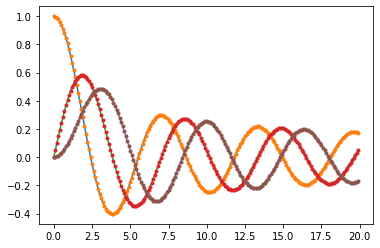

In [6]:
def SimpsonRule(f,a,b,n,args=()):
    x = np.linspace(a,b,2*n+1)
    h = x[1]-x[0]
    s = f(a,*args)+f(b,*args)
    s += 4*np.sum(f(x[1:-1:2],*args))
    s += 2*np.sum(f(x[2:-1:2],*args))
    return s*h/3
#SimpsonRule = np.vectorize(SimpsonRule)
def f(t,m,x):
    return np.cos(m*t-x*np.sin(t))
def J(m,x):
    N = 1000
    I = SimpsonRule(f,0,np.pi,N,args=(m,x))
    return I/np.pi
x = np.arange(0,20,0.1)
Jm = np.zeros((3,x.size))
for m in range(3):
    for i,xi in enumerate(x):
        Jm[m,i] = J(m,xi)
    
    plt.plot(x,Jm[m])
    plt.plot(x,jv(m,x),'.')

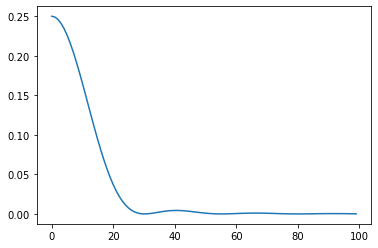

In [7]:
lamda=500 #nm
rmax = 1 #um
k = np.pi*2/(lamda*1e-9)
r = np.linspace(0,rmax*1e-6,100)
I = np.empty(r.size)
I[0] = 0.5*0.5
for i, ri in enumerate(r[1:]):
    I[i+1] = (J(1,k*ri)/(k*ri))**2
plt.plot(I)

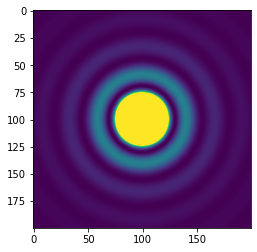

In [10]:
%matplotlib inline
N = 200
x = np.linspace(-rmax*1e-6,rmax*1e-6,N)
y = np.linspace(-rmax*1e-6,rmax*1e-6,N)
X,Y = np.meshgrid(x,y)
R = np.sqrt(X**2+Y**2)
II = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        II[i,j] = (J(1,k*R[i,j])/(k*R[i,j]))**2
plt.imshow(II,vmax=0.01)

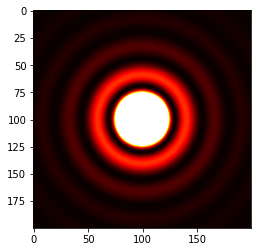

In [63]:
from scipy.special import jv

Ijv = (jv(1,k*R)/(k*R))**2
plt.imshow(Ijv,vmax=0.01,cmap='hot')

### Exercise 5.5

**Error on Simpson's rule**

Following the same line of argument that led to Eq. (5.28), show
that the error on an integral evaluated using Simpson's rule is given, to
leading order in $h$, by Eq. (5.29).

simpson法则的误差是$O(h^4)$, 令
$$N_2=2N_1, h_2=h_1/2$$
设积分的准确值为$I$, 对应于$N_1,h_1$, $N_2,h_2$的积分值分别为$I_1,I_2$, 有
$$I = I_1+ch_1^4=I_2+ch_2^4$$
得到
$$I_2-I_1=ch_1^4-ch_2^4$$
令$\epsilon_2$代表积分误差, 有
$$\epsilon_2=\frac{1}{15}(I_2-I_1)$$

### Exercise 5.6 

 Write a program, or modify an earlier one, to once more calculate
the value of the integral $\int_0^2 (x^4 - 2x + 1) d x$ from
Example (5.28), using the trapezoidal rule with $20$ slices, but this time
have the program also print an estimate of the error on the result,
calculated using the method of Eq. (5.28).  To do this you will need to
evaluate the integral twice, once with $N_1=10$ slices and then again with
$N_2=20$ slices.  Then Eq. (5.28) gives the error.  How does the error
calculated in this manner compare with a direct computation of the error as
the difference between your value for the integral and the true value
of 4.4?  Why do the two not agree perfectly?

写程序或者修改前面的程序，再次计算积分$\int_0^2 (x^4 - 2x + 1) d x$, 采用梯形积分法则, 取$N=20$. 利用公式$$\epsilon=\frac{1}{3}(I_2-I_1)$$计算积分误差. 为了计算误差需要分别计算$N_1=10$和$N_2=20$两种步长的积分值$I_1$和$I_2$. 比较这种方法估计出的积分误差$\epsilon$与你的积分结果$I_2-4.4$之间的差别. 为什么二者不是完全相等?

In [8]:
def f(x):
    return x**4-2*x+1
def trapz(f,a,b,n):
    x = np.linspace(a,b,n+1)
    h = x[1] - x[0]
    s = 0.5*f(a)+0.5*f(b)
    s += np.sum(f(x[1:-1]))
    return s*h
I1 = trapz(f,0,2,10)
I2 = trapz(f,0,2,20)
err = (I2-I1)/3
print(err, I2-4.4)
print(I1,I2)

-0.026633333333333137 0.026660000000000572
4.50656 4.426660000000001


In [6]:
c1= (4.4-I1)/0.2/0.2; c2 = (4.4-I2)/0.1/0.1

In [6]:
import scipy.integrate as si
si.quad(f,0,2)

(4.3999999999999995, 5.003996496050337e-14)

### Exercise 5.7 

 Consider the integral
$$
I = \int_0^1 \sin^2 \sqrt{100 x} d x
$$

1. Write a program that uses the adaptive trapezoidal rule method of
  Section 5.3 and Eq. (5.34) to calculate the value of this integral to an
  approximate accuracy of $\epsilon=10^{-6}$ (i.e., correct to six digits
  after the decimal point).  Start with one single integration slice and
  work up from there to two, four, eight, and so forth.  Have your program
  print out the number of slices, its estimate of the integral, and its
  estimate of the error on the integral, for each value of the number of
  slices $N$, until the target accuracy is reached.  (Hint: You should find
  the result is around $I=0.45$.)
2. Now modify your program to evaluate the same integral using the
  Romberg integration technique described in this section.  Have your
  program print out a triangular table of values, as on page 161, of all
  the Romberg estimates of the integral.  Calculate the error on your
  estimates using Eq. (5.49) and again continue the calculation until you
  reach an accuracy of $\epsilon=10^{-6}$.  You should find that the
  Romberg method reaches the required accuracy considerably faster than the
  trapezoidal rule alone.
 

In [7]:
def trapz(f,a,b,n):
    x = np.linspace(a,b,n+1)
    h = x[1] - x[0]
    s = 0.5*f(a)+0.5*f(b)
    s += np.sum(f(x[1:-1]))
    return s*h
def adpTrapz(f,a,b,n):
    I1 = trapz(f,a,b,n)
    I2 = trapz(f,a,b,2*n)
    if np.abs(I1-I2)<1e-6:
        return I2
    else:
        return adpTrapz(f,a,b,2*n)

In [8]:
def f(x):
    return np.sin(np.sqrt(100*x))**2
adpTrapz(f,0,1,1)

0.45583241380113443

###  Exercise 5.8 

 Write a program that uses the adaptive Simpson's rule method of
Section 5.3 and Eqs. (5.35) to (5.39) to calculate the same integral as in
Exercise 5.7, again to an approximate accuracy of $\epsilon=10^{-6}$.
Starting this time with two integration slices, work up from there to four,
eight, and so forth, printing out the results at each step until the
required accuracy is reached.  You should find you reach that accuracy for
a significantly smaller number of slices than with the trapezoidal rule
calculation in part (a) of Exercise 5.7, but a somewhat larger number than
with the Romberg integration of part (b).

In [24]:
def SimpsonRule(f,a,b,n,args=()):
    x = np.linspace(a,b,2*n+1)
    h = x[1]-x[0]
    s = f(a,*args)+f(b,*args)
    s += 4*np.sum(f(x[1:-1:2],*args))
    s += 2*np.sum(f(x[2:-1:2],*args))
    return s*h/3
def adpSimpsonRule(f,a,b,n):
    I1 = SimpsonRule(f,a,b,n)
    I2 = SimpsonRule(f,a,b,2*n)
    if np.abs(I1-I2)<1e-6:
        return I2
    else:
        return adpSimpsonRule(f,a,b,2*n)

In [36]:
def f(x):
    return np.sin(np.sqrt(100*x))**2
adpSimpsonRule(f,0,1,2)

0.4558325107178051

### Exercise 5.9

**Heat capacity of a solid**

 Debye's theory of solids gives the heat capacity of a solid at
temperature $T$ to be
$$
C_V = 9V\rho k_B \biggl( {T\over\theta_D} \biggr)^3 \int_0^{\theta_D~/T}
      {x^4 e^x\over(e^x-1)^2} d x,
$$
where $V$ is the volume of the solid, $\rho$ is the number density of
atoms, $k_B$ is Boltzmann's constant, and $\theta_D$ is the so-called
\defn{Debye temperature}, a property of solids that depends on their
density and speed of sound.

1. Write a Python function \verb|cv(T)| that calculates $C_V$ for a
  given value of the temperature, for a sample consisting of 1000 cubic
  centimeters of solid aluminum, which has a number density of
  $\rho=6.022\times10^{28}\,\mathrm{m}^{-3}$ and a Debye temperature of
  $\theta_D=428\,$K.  Use Gaussian quadrature to evaluate the integral,
  with $N=50$ sample points.
2. Use your function to make a graph of the heat capacity as a function
  of temperature from $T=5\,$K to $T=500\,$K.
 

**固体的热容**

固体的德拜定理给出温度为$T$的固体的热容为
$$
C_V = 9V\rho k_B \biggl( {T\over\theta_D} \biggr)^3 \int_0^{\theta_D~/T}
      {x^4 e^x\over(e^x-1)^2} d x,
$$
这里$V$是固体的体积, $\rho$是原子数密度, $k_B$是玻尔兹曼常数, $\theta_D$是所谓的德拜温度, 是描述固体性质的一个量, 依赖于它们的密度和声速.

1. 写Python函数cv(T), 对给定的温度计算$C_V$, 样本是1000立方厘米的吕, 它的数密度为$\rho=6.022\times10^{28}\,\mathrm{m}^{-3}$， 德拜温度为
  $\theta_D=428\,$K.使用高斯积分来计算积分结果, 取$N=50$个样本点.
  
2. 利用你的函数画热容随温度的变化, 温度$T=5\,$K 到 $T=500\,$K.

In [8]:
from scipy.special import roots_legendre
from scipy.constants import Boltzmann

def gaussQuad(f,a,b,N):
    x,w = roots_legendre(N) #求[-1,1]上的样本点和权重
    xp = x*(b-a)/2+(b+a)/2 #坐标变换
    wp = w*(b-a)/2         #权重乘以(b-a)/2
    s = 0
    for i in range(N):
        s+=wp[i]*f(xp[i]) #求和
    return(s)
gauQuad = np.vectorize(gaussQuad)

In [9]:
print(Boltzmann)

1.380649e-23


<ipython-input-10-ada69bd0b669>:2: RuntimeWarning: overflow encountered in double_scalars
  return x**4*np.exp(x)/(np.exp(x)-1)**2
<ipython-input-10-ada69bd0b669>:2: RuntimeWarning: overflow encountered in exp
  return x**4*np.exp(x)/(np.exp(x)-1)**2
<ipython-input-10-ada69bd0b669>:2: RuntimeWarning: invalid value encountered in double_scalars
  return x**4*np.exp(x)/(np.exp(x)-1)**2


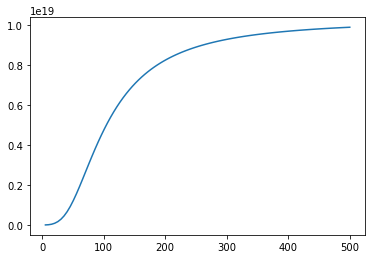

In [10]:
def f(x):
    return x**4*np.exp(x)/(np.exp(x)-1)**2
def cv(T):
    rho = 6.022e28 #m^{-3}
    T_Debye = 428  #K
    V = 1000       #cm^3
    const = 9*V*1e-6*rho*Stefan_Boltzmann/T_Debye**3
    I = gauQuad(f,0,T_Debye/T,50)
    return const*T**3*I
N = 100
T = np.linspace(0.1,500,N)
cvh = cv(T)
plt.plot(T,cvh)

### Exercise 5.10

**Period of an anharmonic oscillator**

 The simple harmonic oscillator crops up in many places.  Its
behavior can be studied readily using analytic methods and it has the
important property that its period of oscillation is a constant,
independent of its amplitude, making it useful, for instance, for keeping
time in watches and clocks.  Frequently in physics, however, we also come
across anharmonic oscillators, whose period varies with amplitude and whose
behavior cannot usually be calculated analytically.

A general classical oscillator can be thought of as a particle in a concave
potential well.  When disturbed, the particle will rock back and forth in
the well:
<img src="anharmonic.png" alt="anharmonic" title="anharmonic" width=300>
The harmonic oscillator corresponds to a quadratic potential $V(x) \propto
x^2$.  Any other form gives an anharmonic oscillator.  (Thus there are many
different kinds of anharmonic oscillator, depending on the exact form of
the potential.)

One way to calculate the motion of an oscillator is to write down the
equation for the conservation of energy in the system.  If the particle has
mass $m$ and position $x$, then the total energy is equal to the sum of the
kinetic and potential energies thus:
$$
E = \frac{1}{2} m \biggl( {d x\over d t} \biggr)^2 + V(x).
$$
Since the energy must be constant over time, this equation is effectively a
(nonlinear) differential equation linking $x$ and $t$.

Let us assume that the potential $V(x)$ is symmetric about $x=0$ and let us
set our anharmonic oscillator going with amplitude $a$.  That is, at $t=0$
we release it from rest at position $x=a$ and it swings back towards the
origin.  Then at $t=0$ we have $d x/d t = 0$ and the equation above
reads $E = V(a)$, which gives us the total energy of the particle in terms
of the amplitude.

1. When the particle reaches the origin for the first time, it has gone
  through one quarter of a period of the oscillator.  By rearranging the
  equation above for $d x/d t$ and then integrating with respect to $t$
  from 0 to $\frac14 T$, show that the period $T$ is given by
$$
T = \sqrt{8m} \int_0^a {d x\over\sqrt{V(a)-V(x)}}.
$$
1. Suppose the potential is $V(x)=x^4$ and the mass of the particle is
  $m=1$.  Write a Python function that calculates the period of the
  oscillator for given amplitude $a$ using Gaussian quadrature with $N=20$
  points, then use your function to make a graph of the period for
  amplitudes ranging from $a=0$ to $a=2$.
2. You should find that the oscillator gets faster as the amplitude
  increases, even though the particle has further to travel for larger
  amplitude.  And you should find that the period diverges as the amplitude
  goes to zero.  How do you explain these results?
 

### Exercise 5.10

**非简谐振子的周期**

简谐振子在很多地方都出现. 它的行为可以用解析解描述, 它的一个重要特征是振动周期是常数，与其振幅无关. 这使得它应用很广, 如钟表计时. 然而，在物理研究中, 我们也常遇到非简谐振子, 它的周期随振幅变化而变化, 它的行为不能解析描述.


一般振子可以看作是一个在下凹势阱中运动的粒子. 当被扰动时, 粒子在势阱中前后运动：

<img src="anharmonic.png" alt="anharmonic" title="anharmonic" width=300>
简谐振子对应于抛物型势阱 $V(x) \propto
x^2$.  其它形势的势阱会导致非简谐振子.  (所以依据势阱的不同，可以产生很多种非简谐振子.)

计算振子运动的一个方法是写出
One way to calculate the motion of an oscillator is to write down the
equation for the conservation of energy in the system.  If the particle has
mass $m$ and position $x$, then the total energy is equal to the sum of the
kinetic and potential energies thus:
$$
E = \frac{1}{2} m \biggl( {d x\over d t} \biggr)^2 + V(x).
$$
Since the energy must be constant over time, this equation is effectively a
(nonlinear) differential equation linking $x$ and $t$.

Let us assume that the potential $V(x)$ is symmetric about $x=0$ and let us
set our anharmonic oscillator going with amplitude $a$.  That is, at $t=0$
we release it from rest at position $x=a$ and it swings back towards the
origin.  Then at $t=0$ we have $d x/d t = 0$ and the equation above
reads $E = V(a)$, which gives us the total energy of the particle in terms
of the amplitude.

1. When the particle reaches the origin for the first time, it has gone
  through one quarter of a period of the oscillator.  By rearranging the
  equation above for $d x/d t$ and then integrating with respect to $t$
  from 0 to $\frac14 T$, show that the period $T$ is given by
$$
T = \sqrt{8m} \int_0^a {d x\over\sqrt{V(a)-V(x)}}.
$$
1. Suppose the potential is $V(x)=x^4$ and the mass of the particle is
  $m=1$.  Write a Python function that calculates the period of the
  oscillator for given amplitude $a$ using Gaussian quadrature with $N=20$
  points, then use your function to make a graph of the period for
  amplitudes ranging from $a=0$ to $a=2$.
2. You should find that the oscillator gets faster as the amplitude
  increases, even though the particle has further to travel for larger
  amplitude.  And you should find that the period diverges as the amplitude
  goes to zero.  How do you explain these results?
 

/var/folders/77/hxs6njj96fn4qgf2d72s5w8m0000gn/T/ipykernel_78255/3669326350.py:4: RuntimeWarning: divide by zero encountered in true_divide
  return 1/np.sqrt(V(a)-V(x))
/var/folders/77/hxs6njj96fn4qgf2d72s5w8m0000gn/T/ipykernel_78255/3669326350.py:10: RuntimeWarning: invalid value encountered in multiply
  return np.sum(wp*f(xp,*args))


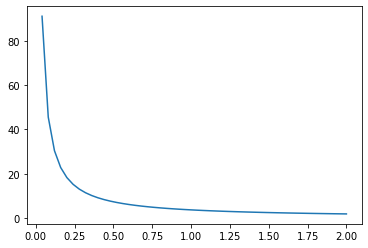

In [4]:
def V(x):
    return x**4
def f(x,a):
    return 1/np.sqrt(V(a)-V(x))
from scipy.special import roots_legendre
def gaussquad(f,a,b,N,args=()):    
    x,w = roots_legendre(N)
    wp = 0.5*(b-a)*w
    xp = 0.5*(b-a)*x+0.5*(b+a)
    return np.sum(wp*f(xp,*args))
N = 20
m=1
n = 51
a = np.linspace(0,2,n)
T = np.zeros_like(a)
for i in range(n):
    T[i]=np.sqrt(8*m)*gaussquad(f,0,a[i],N,args=(a[i],))
plt.plot(a,T)

In [2]:
roots_legendre?

### Exercise 5.11

Suppose a plane wave, such as light or a sound wave, is
blocked by an object with a straight edge, represented by the solid line at
the bottom of this figure:
<img src="edge.png" alt="edge" title="edge" width=300>
The wave will be diffracted at the edge and the resulting intensity at the
position $(x,z)$ marked by the dot is given by near-field diffraction
theory to be
$$
I = \frac{I_0}{8} \Bigl( \bigl[ 2C(u) + 1 \bigr]^2 +
                        \bigl[ 2S(u) + 1 \bigr]^2 \Bigr),
$$
where $I_0$ is the intensity of the wave before diffraction and
$$
u = x \sqrt{2\over\lambda z}\,, \qquad
C(u) = \int_0^u \cos \frac{1}{2}\pi t^2 d t, \qquad
S(u) = \int_0^u \sin \frac{1}{2}\pi t^2 d t.
$$
Write a program to calculate $I/I_0$ and make a plot of it as a function
of $x$ in the range $-5\,$m to $5\,$m for the case of a sound wave with
wavelength $\lambda=1\,$m, measured $z=3\,$m past the straight edge.
Calculate the integrals using Gaussian quadrature with $N=50$ points.  You
should find significant variation in the intensity of the diffracted
sound---enough that you could easily hear the effect if sound were
diffracted, say, at the edge of a tall building.

### Exercise 5.11

设有一平面波, 例如光波或者声波, 被一个平直的边界遮挡，如下图所示:
<img src="edge.png" alt="edge" title="edge" width=300>
波会被边界衍射，在点标记的位置$(x,z)$处的强度可以用近场衍射理论描述

$$
I = \frac{I_0}{8} \Bigl( \bigl[ 2C(u) + 1 \bigr]^2 +
                        \bigl[ 2S(u) + 1 \bigr]^2 \Bigr),
$$
其中$I_0$ 是衍射前的波的强度且
$$
u = x \sqrt{2\over\lambda z}\,, \qquad
C(u) = \int_0^u \cos \frac{1}{2}\pi t^2 d t, \qquad
S(u) = \int_0^u \sin \frac{1}{2}\pi t^2 d t.
$$
写程序计算$I/I_0$，并画出它随$x$的变化, $x$的范围为$-5\,$m 到 $5\,$m，设波为波长$\lambda=1\,$m的声波, 在过边界后$z=3$m处测量.
用高斯积分计算积分结果, 取$N=50$个样本点. 你会看到衍射声波强度的明显变化---你在一个高的建筑物边上可以很容易听到这个效果.

Text(0, 0.5, 'I/I0')

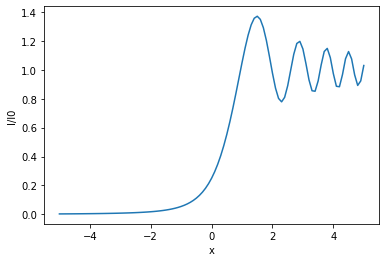

In [22]:
def f1(t):
    return np.cos(0.5*np.pi*t*t)
def f2(t):
    return np.sin(0.5*np.pi*t*t)
lmbda = 1 #m
I0 = 1
z = 3 #m
l = 5
n = 101 #grid for x
N = 50 #points for Gaussian quadrature
x = np.linspace(-5,5,n)
u = x*np.sqrt(2/(lmbda*z))
C = np.zeros_like(u)
S = np.zeros_like(u)
I = np.zeros_like(u)
for i in range(n):
    C[i] = gaussquad(f1,0,u[i],N)
    S[i] = gaussquad(f2,0,u[i],N)
    I[i] = ((2*C[i]+1)**2+(2*S[i]+1)**2)/8
plt.plot(x,I)
plt.xlabel('x')
plt.ylabel('I/I0')

### Exercise 5.12

**The Stefan--Boltzmann constant**

The Planck theory of thermal radiation tells us that in the
(angular) frequency interval $\omega$ to $\omega+d\omega$, a black body
of unit area radiates electromagnetically an amount of thermal energy per
second equal to $I(\omega)d\omega$, where
$$
  I(\omega) = {\hbar\over4\pi^2c^2}\,{\omega^3\over(e^{\hbar\omega/k_BT}-1)}.
$$
Here $\hbar$ is Planck's constant over $2\pi$, $c$ is the speed of light,
and $k_B$ is Boltzmann's constant.

1. Show that the total energy per unit area radiated by a black body is
$$
W = {k_B^4 T^4\over4\pi^2c^2\hbar^3} \int_0^\infty {x^3\over e^x-1}d x.
$$
2. Write a program to evaluate the integral in this expression.  Explain
  what method you used, and how accurate you think your answer is.
3. Even before Planck gave his theory of thermal radiation around the
  turn of the 20th century, it was known that the total energy $W$ given
  off by a black body per unit area per second followed Stefan's
  law: $W = \sigma T^4$, where $\sigma$ is the Stefan--Boltzmann constant.
  Use your value for the integral above to compute a value for the
  Stefan--Boltzmann constant (in SI units) to three significant figures.
  Check your result against the known value, which you can find in books or
  on-line.  You should get good agreement.
 

**斯特蕃-玻尔兹曼常数**

按照普朗克定律，在频率间隔$\omega$ 到 $\omega+d\omega$，一个黑体单位面积上每秒以电磁波的形式辐射的热能为$I(\omega)d\omega$, 这里
$$
  I(\omega) = {\hbar\over4\pi^2c^2}\,{\omega^3\over(e^{\hbar\omega/k_BT}-1)}.
$$
其中 $\hbar$ 是普朗克常数, $c$是光速, $k_B$ 是玻尔兹曼常数.

1. 说明黑体单位面积辐射的总能量为

$$
W = {k_B^4 T^4\over4\pi^2c^2\hbar^3} \int_0^\infty {x^3\over e^x-1}d x.
$$


2. 写程序计算这个积分. 解释你采用的积分算法以及你的算法精度.


3. 在普朗克定律诞生之前约20世纪, 黑体单位面积辐射的能量$W$由斯特蕃定律给出
 $W = \sigma T^4$, $\sigma$ 是斯特蕃-玻尔兹曼常数. 用你的积分结果计算斯特蕃-玻尔兹曼常数(国际单位制)，保留3位有效数字. 将你的结果与scipy.constants中的 Stefan_Boltzmann的值比较.

#### 解·
1. 令$x=\hbar\omega/(k_BT)$, $\omega=xk_BT/\hbar$, $d\omega=k_BT/\hbar$,方程
$$I(\omega)d\omega = \frac{k_B^4T^4}{4\pi^2c^2\hbar^3}\frac{x^3}{e^x-1}dx$$
单位面积的总能量就是对所有频率的辐射进行积分，有
$$\int_0^{\infty}I(\omega)d\omega =\frac{k_B^4T^4}{4\pi^2c^2\hbar^3}\int_0^{\infty}\frac{x^3}{e^x-1}dx$$

In [33]:
def f1(x):
    return x**3/(np.exp(x)-1)
def f(z):
    return f1(z/(1-z))/(1-z)**2
from scipy.special import roots_legendre
def gaussquad(f,a,b,N,args=()):    
    x,w = roots_legendre(N)
    wp = 0.5*(b-a)*w
    xp = 0.5*(b-a)*x+0.5*(b+a)
    return np.sum(wp*f(xp,*args))
I = gaussquad(f,0,1,50)

from scipy.constants import Boltzmann, Stefan_Boltzmann, c, hbar
Boltzmann**4*I/(4*(np.pi*c)**2*hbar**3),Stefan_Boltzmann

<ipython-input-33-68004cee6627>:2: RuntimeWarning: overflow encountered in exp
  return x**3/(np.exp(x)-1)


(5.670374417654672e-08, 5.670374419e-08)

### Exercise 5.13

**Quantum uncertainty in the harmonic oscillator** 简谐振子中的量子不确定性

In units where all the constants are 1, the wavefunction of the
$n$th energy level of the one-dimensional quantum harmonic
oscillator---i.e., a spinless point particle in a quadratic potential
well---is given by
$$
\psi_n(x) = {1\over\sqrt{2^n n!\sqrt{\pi}}}\, e^{-x^2/2}\,H_n(x),
$$
for $n=0\ldots\infty$, where $H_n(x)$ is the $n$th Hermite
polynomial.  Hermite polynomials satisfy a relation somewhat similar to
that for the Fibonacci numbers, although more complex:
$$
H_{n+1}(x) = 2xH_n(x) - 2nH_{n-1}(x).
$$
The first two Hermite polynomials are $H_0(x)=1$ and $H_1(x)=2x$.


1. Write a user-defined function \verb|H(n,x)| that calculates $H_n(x)$
  for given $x$ and any integer $n\ge0$.  Use your function to make a plot
  that shows the harmonic oscillator wavefunctions for $n=0$, 1, 2, and 3,
  all on the same graph, in the range $x=-4$ to $x=4$.  Hint: There is a
  function \verb|factorial| in the \verb|math| package that
  calculates the factorial of an integer.
2. Make a separate plot of the wavefunction for $n=30$ from $x=-10$ to
  $x=10$.  Hint: If your program takes too long to run in this case, then
  you're doing the calculation wrong---the program should take only a
  second or so to run.
3. The quantum uncertainty of a particle in the $n$th level of a quantum
  harmonic oscillator can be quantified by its root-mean-square position
  $\sqrt{\langle x^2\rangle}$, where
$$
\langle x^2\rangle = \int_{-\infty}^\infty x^2 |\psi_n(x)|^2 d x.
$$
Write a program that evaluates this integral using Gaussian quadrature on
100 points and then calculates the uncertainty (i.e., the root-mean-square
position of the particle) for a given value of $n$.  Use your program to
calculate the uncertainty for $n=5$.  You should get an answer in the
vicinity of $\sqrt{\langle{x^2}\rangle}=2.3$.
 

设取一个令所有常量为1的单位，一维量子谐振子第$n$个能级的波函数，抛物势阱中的无自旋转质点由下面的公式给出
$$
\psi_n(x) = {1\over\sqrt{2^n n!\sqrt{\pi}}}\, e^{-x^2/2}\,H_n(x),
$$
$n=0\ldots\infty$, 这里 $H_n(x)$是$n$阶厄尔米特多项式.  厄尔米特多项式满足递推关系:
$$
H_{n+1}(x) = 2xH_n(x) - 2nH_{n-1}(x).
$$
第一阶和第二阶的厄尔米特多项式分别是$H_0(x)=1$ 和 $H_1(x)=2x$.

1. 定义函数$H(n,x)$, 对给定的$x$和任意$n>0$, 计算$H_n(x)$. 利用函数在同一幅图中画出$n=0,1,2,3$的简谐振子波函数, $x$从$-4$到$4$. 提示: 在math包中有factorial函数可以用来计算整数的阶乘.
 
 
2. 画一个$n=30$的波函数, $x$的范围从$-10$到$10$. 提示: 如果程序运行时间过长, 那么有可能计算错误，程序应该运行1秒左右.  


3. 第$n$级量子谐振子的量子不确定性可以由其位置的均方根$\sqrt{\langle x^2\rangle}$来量化, 这里 
  
$$
\langle x^2\rangle = \int_{-\infty}^\infty x^2 |\psi_n(x)|^2 d x.
$$

写程序使用100个格点的高斯积分法计算能这个积分，之后计算不确定性(即，粒子位置的均方根)
用程序计算$n=5$的粒子的位置不确定性. 答案应该接近$\sqrt{\langle{x^2}\rangle}=2.3$.

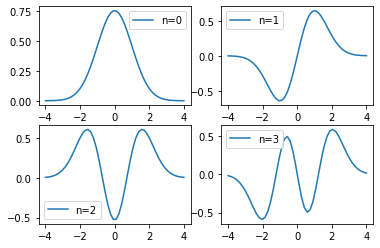

In [37]:
#from math import factorial
from scipy.special import factorial
def H(x,n):
    if n == 0:
        return 1
    if n == 1:
        return 2*x
    return 2*x*H(x,n-1)-2*(n-1)*H(x,n-2)
def Psi(x,n):
    a = 1/np.sqrt(2**n*factorial(n)*np.sqrt(np.pi))
    return a*np.exp(-x**2/2)*H(x,n)
x = np.linspace(-4,4,50)
psi = np.vectorize(Psi)
for i in range(4):
    plt.subplot(2,2,i+1)
    y = psi(x,i)
    plt.plot(x,y,label=f'n={i}')
    plt.legend()

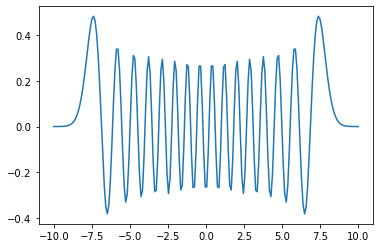

In [38]:
@jit
def H(x,n):
    if n == 0:
        return 1
    if n == 1:
        return 2*x
    return 2*x*H(x,n-1)-2*(n-1)*H(x,n-2)
@jit
def Psi(x,n):
    a = 1/np.sqrt(2**n*factorial(n)*np.sqrt(np.pi))
    return a*np.exp(-x**2/2)*H(x,n)
x = np.linspace(-10,10,200)
y = psi(x,30)
plt.plot(x,y)

In [40]:
def f(x):
    return x**2*np.abs(psi(x,n=5))**2
def g(z):
    return (1+z**2)/(1-z**2)**2*f(z/(1-z**2))
I = gaussquad(g,-1,1,100)
np.sqrt(I)

2.345207873785794

### Exercise 5.14 

**Gravitational pull of a uniform sheet**

 A uniform square sheet of metal is floating motionless in space:

<img src="plate.png" alt="plate" title="plate" width=300>
The sheet is $10\,$m on a side and of negligible thickness, and it has a
mass of 10 metric tonnes.

1. Consider the gravitational force due to the plate felt by a point
  mass of $1\,$kg a distance $z$ from the center of the square, in the
  direction perpendicular to the sheet, as shown above.  Show that the
  component of the force along the $z$-axis is
$$
F_z = G\sigma z \iint_{-L/2}^{L/2} {d x\,d y\over(x^2+y^2+z^2)^{3/2}}\,,
$$
where
$G=6.674\times10^{-11}\,\mathrm{m}^3\,\mathrm{kg}^{-1}\,\mathrm{s}^{-2}$ is
Newton's gravitational constant and $\sigma$ is the mass per unit area of
the sheet.
2. Write a program to calculate and plot the force as a function of $z$
  from $z=0$ to $z=10\,$m.  For the double integral use (double) Gaussian
  quadrature, as in Eq. (5.82), with 100 sample points along each axis.
3. You should see a smooth curve, except at very small values of $z$,
  where the force should drop off suddenly to zero.  This drop is not a
  real effect, but an artifact of the way we have done the calculation.
  Explain briefly where this artifact comes from and suggest a strategy to
  remove it, or at least to decrease its size.
 
This calculation can thought of as a model for the gravitational pull of a
galaxy.  Most of the mass in a spiral galaxy (such as our own Milky Way)
lies in a thin plane or disk passing through the galactic center, and the
gravitational pull exerted by that plane on bodies outside the galaxy can
be calculated by just the methods we have employed here.

**均匀薄片的引力**


一块均匀的正方形金属板漂浮在空中静止不动:
<img src="plate.png" alt="plate" title="plate" width=200>
金属板边长为$10\,$m, 厚度可以忽略, 质量为10吨.

1. 在正方形金属板中心垂直正上方距离$z$处一个质量为1kg的质点所受的万有引力，说明沿$z$轴方向的引力表示为
$$
F_z = G\sigma z \iint_{-L/2}^{L/2} {d x\,d y\over(x^2+y^2+z^2)^{3/2}}\,,
$$
$G=6.674\times10^{-11}\,\mathrm{m}^3\,\mathrm{kg}^{-1}\,\mathrm{s}^{-2}$ 
是万有引力常数, $\sigma$是金属板上单位面积的质量.

 
2. 写程序计算并画出引力沿$z$方向的变化, $z$从0到10m. 采用二重高斯积分, 如方程(5.82)所示, 每个轴都取100个样本点.


3. 结果应该是一个平滑的曲线, 除了$z$非常小的时候力突然下降到0.


这个下降是计算导致的，并不是真实的结果. 解释这个现象产生的原因，找出部分消除或者至少减弱它的大小.

这个计算可以看作星系引力简化模型. 漩涡星系的大多数质量(比如银河系)都在通过银心的薄盘中, 银河系对外面天体的引力可以用我们这里的公式计算. 

1. 1kg质点所受的来自金属板上$(x,y)$位置的由引力为
$$dF=\frac{GdMm}{r^2},$$
这里$r^2=x^2+y^2+z^2$，$m=1$kg, $dM=\sigma dxdy$, $dF$在$z$方向的分量为
$$dF_z=dF\cos\theta = dFz/r=\frac{G\sigma zdxdy}{r^3}$$
对整个金属棒积分得
$$
F_z = G\sigma z \iint_{-L/2}^{L/2} {d x\,d y\over(x^2+y^2+z^2)^{3/2}}\,,
$$

In [3]:
def f(x,y,z):
    G = 6.674e-11
    sigma = 10000/100 #面密度10吨/10*10 m^2
    return G*sigma*z/(x**2+y**2+z**2)**1.5

from scipy.special import roots_legendre

def gaussquad(f,a1,a2,N,args=()):    
    x,wx = roots_legendre(N)
    wx = 0.5*(a2-a1)*wx
    xp = 0.5*(a2-a1)*x+0.5*(a2+a1)
    wi,wj = np.meshgrid(wx,wx)
    x,y=np.meshgrid(xp,xp)
    s = np.sum(wi*wj*f(x,y,*args))
    return s
z=np.linspace(np.spacing(1),10,101)
L=5
N=100
fz = np.zeros(z.size)
for i in range(z.size):
    fz[i] = gaussquad(f,-L,L,N,args=(z[i],))

Text(0, 0.5, '$F_z$')

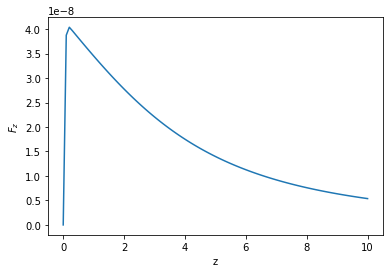

In [4]:
plt.plot(z,fz)
plt.xlabel('z')
plt.ylabel('$F_z$')

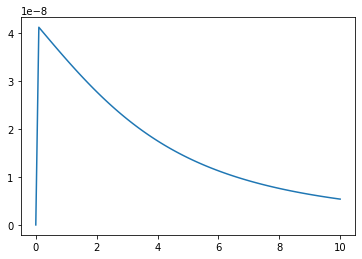

In [6]:
from scipy.integrate import nquad

def f(x,y,z):
    G = 6.674e-11
    sigma = 10000/100 #面密度10吨/10*10 m^2
    return G*sigma*z/(x**2+y**2+z**2)**1.5

z=np.linspace(np.spacing(1),10,101)
L=5
N=100
fz = np.zeros(z.size)
for i in range(z.size):
    fz[i] = nquad(f,[[-L,L],[-L,L]],args=(z[i],))[0]
plt.plot(z,fz)

### Exercise 5.15 

定义函数$f(x)$，返回$1+\frac{1}{2}\tanh 2x$, 利用中心差分公式计算函数在$-2\le x\le 2$上的导数. 计算导数的解析式，将解析解和数值解画在一幅图中. 可以将解析解和数值解分别用线和点画出. (提示: tanh可以用numpy中找到.)

In [59]:
from sympy import tanh, symbols, diff, lambdify
x = symbols('x')
expr = diff(1+0.5*tanh(2*x),x) #对函数求导数
df = lambdify(x, expr) #将sympy函数转换成numpy函数

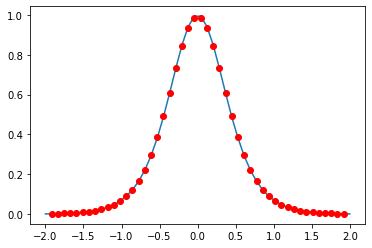

In [60]:
import math
def f(x):
    return 1+0.5*np.tanh(2*x)
N = 50
x = np.linspace(-2,2,N)
plt.plot(x,df(x))
dy = []
dx = x[2]-x[0]
for i in range(1,N-1):
    dy.append((f(x[i+1])-f(x[i-1]))/dx)
plt.plot(x[1:-1],dy,'ro')

### Exercise 5.16 

 Even when we can find the value of $f(x)$ for any value of $x$
the forward difference can still be more accurate than the central
difference for sufficiently large $h$.  For what values of $h$ will the
approximation error on the forward difference of Eq. (5.87) be smaller than
on the central difference of Eq. (5.95)?

### Exercise 5.17

**The gamma function**

A commonly occurring function in physics calculations is the
gamma function $\Gamma(a)$, which is defined by the integral
$$
\Gamma(a) = \int_0^\infty x^{a-1} e^{-x} d x.
$$
There is no closed-form expression for the gamma function, but one can
calculate its value for given $a$ by performing the integral above
numerically.  You have to be careful how you do it, however, if you wish to
get an accurate answer.

1. Write a program to make a graph of the value of the integrand
  $x^{a-1} e^{-x}$ as a function of $x$ from $x=0$ to $x=5$, with three
  separate curves for $a=2$, 3, and 4, all on the same axes.  You should
  find that the integrand starts at zero, rises to a maximum, and then
  decays again for each curve.
2. Show analytically that the maximum falls at $x=a-1$.
3. Most of the area under the integrand falls near the maximum, so to
  get an accurate value of the gamma function we need to do a good job of
  this part of the integral. We can change the integral from 0 to $\infty$
  to one over a finite range from 0 to 1 using the change of variables in
  Eq. (5.67), but this tends to squash the peak towards the edge of the
  $[0,1]$ range and does a poor job of evaluating the integral accurately.
  We can do a better job by making a different change of variables that
  puts the peak in the middle of the integration range, around $1/2$.  We
  will use the change of variables given in Eq. (5.69), which we repeat
  here for convenience:
$$
z = {x\over c+x}.
$$
For what value of $x$ does this change of variables give $z=1/2$?  Hence
what is the appropriate choice of the parameter $c$ that puts the peak of
the integrand for the gamma function at $z=1/2$?
1. Before we can calculate the gamma function, there is another detail
  we need to attend to.  The integrand $x^{a-1} e^{-x}$ can be difficult
  to evaluate because the factor $x^{a-1}$ can become very large and the
  factor $e^{-x}$ very small, causing numerical overflow or underflow, or
  both, for some values of $x$.  Write $x^{a-1}=e^{(a-1)\ln x}$ to derive
  an alternative expression for the integrand that does not suffer from
  these problems (or at least not so much).  Explain why your new
  expression is better than the old one.
2. Now, using the change of variables above and the value of $c$ you
  have chosen, write a user-defined function \verb|gamma(a)| to calculate
  the gamma function for arbitrary argument $a$.  Use whatever integration
  method you feel is appropriate.  Test your function by using it to
  calculate and print the value of $\Gamma(\frac32)$, which is known to be
  equal to $\frac12\sqrt{\pi}\simeq0.886$.
3. For integer values of $a$ it can be shown that $\Gamma(a)$ is equal
  to the factorial of $a-1$.  Use your Python function to calculate
  $\Gamma(3)$, $\Gamma(6)$, and $\Gamma(10)$.  You should get answers
  closely equal to $2!=2$, $5!=120$, and $9!=362\,880$.
 

**伽马函数**

伽马函数$\Gamma(a)$是物理计算中常见的函数，
$$
\Gamma(a) = \int_0^\infty x^{a-1} e^{-x} d x.
$$
伽马函数没有解析解, 但是可以用积分计算给定$a$的函数值. 为得到精确结果则需要更仔细些.

 1. $x$从0到5，分别计算$a=2,3,4$的被积函数$x^{a-1} e^{-x}$，画在同一张图上. 你会发现被积函数从0开始上升到最大值之后再下降.

Text(0.5, 0, '$x$')

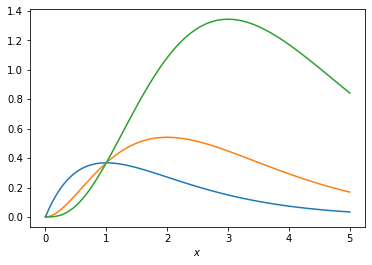

In [62]:
def f(x,a):
    return x**(a-1)*np.exp(-x)
x = np.linspace(0,5,100)
plt.plot(x,f(x,a=2))
plt.plot(x,f(x,a=3))
plt.plot(x,f(x,a=4))
plt.xlabel('$x$')

2. 解析的说明最大值位于$x=a-1$.

In [57]:
from sympy import diff,symbols,exp,solve,Eq
x,a=symbols('x,a')
solve(Eq(diff(x**(a-1)*exp(-x),x),0),x)[0] #对被积函数求导数并令导数为0，解方程
#diff(x*a/(1-x),x).simplify()

a - 1

3. 被积函数多数面积居于最大值附近, 为了获得更精确的伽马函数值，我们需要对这部分积分更仔细. 我们将从0到$\infty$的积分变换到0到1的积分, 但是这个变换会将峰值挤压到[0,1]范围的边界附近，对更准确的估计积分值不利. 我们可以做不同的变量代换使得峰值落于积分区域的中心, 约1/2. 我们将用到下面这个代换
$$
z = {x\over c+x}.
$$
当$x$取何值时这个变换能够使得$z=1/2$? 因而$c$取何值时使得被积函数的峰值落于$z=1/2$?

<ipython-input-78-ad61b3f2713c>:4: RuntimeWarning: divide by zero encountered in true_divide
  return f1(c*z/(1-z),a)*c/(1-z)**2
<ipython-input-78-ad61b3f2713c>:2: RuntimeWarning: invalid value encountered in multiply
  return x**(a-1)*np.exp(-x)


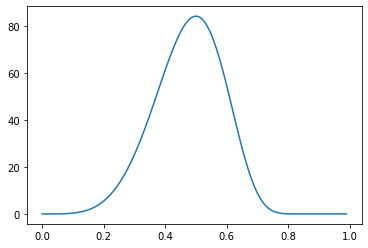

In [78]:
def f1(x,a):
    return x**(a-1)*np.exp(-x)
def f(z,a,c):
    return f1(c*z/(1-z),a)*c/(1-z)**2
z=np.linspace(0,1,100)
plt.plot(z,f(z,5,5))

当$c=a$时峰值落于1/2

4. 在计算伽马函数之前, 我们需要注意另外一个细节. 被积函数$x^{a-1} e^{-x}$估计起来比较难, 因为在某些$x$值时, $x^{\alpha-1}$可以很大而$e^{-x}$会变得很小, 导致数值向上溢出或者向下溢出. 变换$x^{a-1}=e^{(a-1)\ln x}$不受这个问题的影响(或者受的影响比较小). 解释为什么新的表达式好于旧的.

4. 现在, 使用上面的变量代换以及你选择的$c$值, 定义函数gamma(a)计算$a$取任意值时的伽马函数. 选择任何积分方法都可以. 用函数计算$\Gamma(\frac{3}{2})$来测试函数, 这个值是 $\frac12\sqrt{\pi}\simeq0.886$.

In [1]:
def f1(x,a):
    return np.exp((a-1)*np.log(x)-x)
def f(z,a,c):
    return f1(c*z/(1-z),a)*c/(1-z)**2
from scipy.special import roots_legendre
def gaussquad(f,a,b,N,args=()):    
    x,w = roots_legendre(N)
    wp = 0.5*(b-a)*w
    xp = 0.5*(b-a)*x+0.5*(b+a)
    return np.sum(wp*f(xp,*args))
a=1.5
gaussquad(f,0,1,50,args=(a,a))

NameError: name 'np' is not defined

5. 当$a$是整数时, $\Gamma(a)$等于$a-1$的阶乘. 用你的函数计算$\Gamma(3)$, $\Gamma(6)$, 和 $\Gamma(10)$. 你的答案应该接近$2!=2$, $5!=120$, 和 $9!=362\,880$.

### Exercise 5.18

Rearranging Eq. (5.19) into a slightly more conventional form, we
have:
$$
\int_a^b f(x) d x
  = h \biggl[ \frac{1}{2} f(a) + \frac{1}{2} f(b) + \sum_{k=1}^{N-1} f(a+kh)
            \biggr] + \tfrac{1}{12} h^2 \bigl[ f'(a) - f'(b) \bigr] +
            O(h^4).
$$
This result gives a value for the integral on the left which has an error
of order $h^4$---a factor of $h^2$ better than the error on the trapezoidal
rule and as good as Simpson's rule.  We can use this formula as a new rule
for evaluating integrals, distinct from any of the others we have seen in
this chapter.  We might call it the ``Euler--Maclaurin rule.''

1. Write a program to calculate the value of the integral $\int_0^2
  (x^4-2x+1) d x$ using this formula.  (This is the same integral that
  we studied in Example 5.1, whose true value is 4.4.)  The order-$h$ term
  in the formula is just the ordinary trapezoidal rule; the $h^2$ term
  involves the derivatives $f'(a)$ and $f'(b)$, which you should evaluate
  using central differences, centered on $a$ and $b$ respectively.  Note
  that the size of the interval you use for calculating the central
  differences does not have to equal the value of $h$ used in the
  trapezoidal rule part of the calculation.  An interval of about $10^{-5}$
  gives good values for the central differences.

  Use your program to evaluate the integral with $N=10$ slices and compare
  the accuracy of the result with that obtained from the trapezoidal rule
  alone with the same number of slices.
2. Good though it is, this integration method is not much used in
  practice.  Suggest a reason why not.
 

将方程(5.19)变形为更传统的形式：
$$
\int_a^b f(x) d x
  = h \biggl[ \frac{1}{2} f(a) + \frac{1}{2} f(b) + \sum_{k=1}^{N-1} f(a+kh)
            \biggr] + \tfrac{1}{12} h^2 \bigl[ f'(a) - f'(b) \bigr] +
            O(h^4).
$$
右侧公式计算的是左侧的积分值, 误差为$h^4$，比梯形积分的误差多一个$h^2$的因子，和辛普森积分精度差不多. 我们用这个公式作为估计积分的新法则， 与这章其他的法则有所不同。 我们称之为``Euler--Maclaurin rule.''

1. 写程序用这个公式计算积分$\int_0^2
  (x^4-2x+1) d x$. (这个积分的精确解是4.4.) $h$项是普通的梯形积分；$h^2$项包含一阶导数$f'(a)$和$f'(b)$, 可以用中心差分公式，中心分别在$a$和$b$. 注意计算中心差分公式的步长，这个步长不需要和梯形积分部分相等. $10^{-5}$的步长可以给出一个不错的精度。
  
  用程序计算$N=10$个切片的积分，并和同样切片数目的梯形积分的精度比较.
  
  
2. 结构结果精度很好，但是这个积分方法并不经常使用. 试着分析原因.

### Exercise 5.19

**Diffraction gratings**

Light with wavelength $\lambda$ is incident on a diffraction
grating of total width $w$, gets diffracted, is focused with a lens of
focal length $f$, and falls on a screen:
<img src="diffraction.png" width=500>
Theory tells us that the intensity of the diffraction pattern on the
screen, a distance $x$ from the central axis of the system, is given by
$$
I(x) = \biggl| \int_{-w/2}^{w/2} \sqrt{q(u)}\>
               e^{i 2\pi xu/\lambda f} d u \biggr|^2,
$$
where $q(u)$ is the intensity transmission function of the diffraction
grating at a distance $u$ from the central axis, i.e., the fraction of the
incident light that the grating lets through.

1. Consider a grating with transmission function $q(u) = \sin^2 \alpha
  u$.  What is the separation of the ``slits'' in this grating, expressed
  in terms of $\alpha$?
2. Write a Python function \verb|q(u)| that returns the transmission
  function $q(u) = \sin^2 \alpha u$ as above at position $u$ for a grating
  whose slits have separation $20\,\mu$m.
3. Use your function in a program to calculate and graph the intensity
  of the diffraction pattern produced by such a grating having ten slits in
  total, if the incident light has wavelength $\lambda=500\,$nm.  Assume
  the lens has a focal length of 1 meter and the screen is $10\,$cm wide.
  You can use whatever method you think appropriate for doing the integral.
  Once you've made your choice you'll also need to decide the number of
  sample points you'll use.  What criteria play into this decision?

  Notice that the integrand in the equation for $I(x)$ is complex, so you
  will have to use complex variables in your program.  As mentioned in
  Section 2.2.5, there is a version of the \verb|math| package for use with
  complex variables called \verb|cmath|.  In particular you may find the
  \verb|exp| function from \verb|cmath| useful because it can calculate the
  exponentials of complex arguments.
4. Create a visualization of how the diffraction pattern would look on
  the screen using a density plot (see Section 3.3).  Your plot should look
  something like this: 
<img src="pattern.png" width=500>

5. Modify your program further to make pictures of the diffraction
  patterns produced by gratings with the following profiles:
  
    a. A transmission profile that obeys 
    $q(u) = \sin^2\alpha u\, \sin^2\beta u$, with $\alpha$ as before and the same total grating width $w$, and $\beta=\frac{1}{2}\alpha$.

    b. Two ''square'' slits, meaning slits with 100\% transmission through
  the slit and 0\% transmission everywhere else.  Calculate the diffraction
  pattern for non-identical slits, one $10\,\mu$m wide and the other
  $20\,\mu$m wide, with a $60\,\mu$m gap between the two.
 
 

**衍射光栅**

波长为$\lambda$的光照射到总宽度为$w$的衍射光栅上被衍射, 被焦距为$f$的透镜聚焦，落在一个屏上：
<img src="diffraction.png" width=500>
理论可以计算出屏上的衍射图样的强度，距轴心距离为$x$由下面公式给出
$$
I(x) = \biggl| \int_{-w/2}^{w/2} \sqrt{q(u)}\>
               e^{i 2\pi xu/\lambda f} d u \biggr|^2,
$$
这里$q(u)$是衍射光栅距离中心轴距离$u$处的强度转化函数，即透过光栅的入射光的比例.

1. 假设光栅的透射函数是$q(u) = \sin^2 \alpha
  u$. 这个光栅的长缝间距是多少？用$\alpha$表示.

2. 定义函数q(u), 返回$q(u) = \sin^2 \alpha u$，光栅长缝间距为$20\,\mu$m
  
3. 设入射光的波长$\lambda=500\,$nm，计算并画出有10个长缝的衍射光栅的衍射图样. 假设透镜的焦距为1米, 屏的宽度为10cm. 选择一种你认为合适的积分法. 确定方法之后还需要决定样本点的数目, 做这个决定需要考虑哪些方面?

4. 使用强度图展示衍射图样. 你的图应该类似于
 
<img src="pattern.png" width=500>

5. 修改程序，画出下面轮廓的光栅的衍射图样:
  
    a. 透射轮廓服从
    $q(u) = \sin^2\alpha u\, \sin^2\beta u$, 这里$\alpha$和总宽度与前面一致 $\beta=\frac{1}{2}\alpha$.

    b. 两个正方形狭缝, 即狭缝有100%的透射率，其他地方透射率为0. 计算不同的两个方形狭缝的衍射图样, 一个宽度$10\,\mu$m，另一个宽$20\,\mu$m，两个狭缝的间距为$60\,\mu$m.
 

### Exercise 5.20

**A more advanced adaptive method for the trapezoidal
  rule**

 In Section 5.3 we studied an adaptive version of the trapezoidal
rule in which the number of steps is increased---and the width $h$ of the
slices correspondingly decreased---until the calculation gives a value for
the integral accurate to some desired level.  Although this method
varies $h$, it still calculates the integral at any individual stage of the
process using slices of equal width throughout the domain of integration.
In this exercise we look at a more sophisticated form of the trapezoidal
rule that uses different step sizes in different parts of the domain, which
can be useful particularly for poorly behaved functions that vary rapidly
in certain regions but not others.  Remarkably, this method is not much
more complicated to program than the ones we've already seen, if one knows
the right tricks.  Here's how the method works.

  Suppose we wish to evaluate the integral $I = \int_a^b f(x) d x$ and
  we want an error of no more than $\epsilon$ on our answer.  To put that
  another way, if we divide up the integral into slices of width $h$ then
  we require an accuracy per slice of
$$
h\,{\epsilon\over b-a} = h\delta,
$$
where $\delta = \epsilon/(b-a)$ is the target accuracy per unit interval.

We start by evaluating the integral using the trapezoidal rule with just a
single slice of width $h_1=b-a$.  Let us call the estimate of the integral
from this calculation $I_1$.  Usually $I_1$ will not be very accurate, but
that doesn't matter.  Next we make a second estimate $I_2$ of the integral,
again using the trapezoidal rule but now with two slices of width
$h_2=\frac{1}{2} h_1$ each.  Equation (5.28) tells us that the error on this
second estimate is $\frac13(I_2-I_1)$ to leading order.  If this error is
smaller than the required accuracy $\epsilon$ then our calculation is
complete and we need go no further.  $I_2$ is a good enough estimate of the
integral.

Most likely, however, this will not be the case; the accuracy will not be
good enough.  If so, then we divide the integration interval into two equal
parts of size $\frac{1}{2} (b-a)$ each, and we repeat the process above in each
part separately, calculating estimates $I_1$ and $I_2$ using one and two
slices respectively, estimating the error, and checking to see if it is
less than the required accuracy, which is now $\frac{1}{2}(b-a)\delta =
\frac{1}{2}\epsilon$.

We keep on repeating this process, dividing each slice in half and in half
again, as many times as necessary to achieve the desired accuracy in every
slice.  Different slices may be divided different numbers of times, and
hence we may end up with different sized slices in different parts of the
integration domain.  The method automatically uses whatever size and number
of slices is appropriate in each region.

1. Write a program using this method to calculate the integral
$$
I = \int_0^{10} {\sin^2 x\over x^2} d x,
$$
to an accuracy of $\epsilon=10^{-4}$.  Start by writing a function to
calculate the integrand $f(x) = (\sin^2 x)/x^2$.  Note that the limiting
value of the integrand at $x=0$ is 1.  You'll probably have to include this
point as a special case in your function using an if statement.

The best way to perform the integration itself is to make use of the
technique of recursion, the ability of a Python function to call itself.
(If you're not familiar with recursion, you may like to look at
Exercise 2.13 on page 83 before doing this exercise.)  Write a function
\verb|step(x1,x2,f1,f2)| that takes as arguments the beginning and end
points $x_1,x_2$ of a slice and the values $f(x_1), f(x_2)$ of the
integrand at those two points, and returns the value of the integral from
$x_1$ to $x_2$.  This function should evaluate the two estimates $I_1$
and $I_2$ of the integral from $x_1$ to $x_2$, calculated with one and two
slices respectively, and the error $\frac13(I_2-I_1)$.  If this error meets
the target value, which is $(x_2-x_1)\delta$, then the calculation is
complete and the function simply returns the value $I_2$.  If the error
fails to meet the target, then the function calls itself, twice, to
evaluate the integral separately on the first and second halves of the
interval and returns the sum of the two results.  (And then \emph{those}
functions can call themselves, and so forth, subdividing the integral as
many times as necessary to reach the required accuracy.)

Hint: As icing on the cake, when the error target is met and the function
returns a value for the integral in the current slice, it can, in fact,
return a slightly better value than the estimate $I_2$.  Since you will
already have calculated the value of the integrand $f(x)$ at $x_1$, $x_2$,
and the midpoint $x_m=\frac{1}{2}(x_1+x_2)$ in order to evaluate $I_2$, you can
use those results to compute the improved Simpson's rule estimate,
Eq. (5.7), for this slice.  You just return the value $\frac16
h[f(x_1)+4f(x_m)+f(x_2)]$ instead of the trapezoidal rule estimate $\frac14
h[f(x_1)+2f(x_m)+f(x_2)]$ (where $h=x_2-x_1$).  This involves very little
extra work, but gives a value that is more accurate by two orders in $h$.
(Technically, this is an example of the method of ``local extrapolation,''
although it's perhaps not obvious what we're extrapolating in this case.
We'll discuss local extrapolation again when we study adaptive methods for
the solution of differential equations in Section 8.4.)
2. Why does the function \verb|step(x1,x2,f1,f2)| take not only the
  positions $x_1$ and $x_2$ as arguments, but also the values $f(x_1)$
  and $f(x_2)$?  Since we know the function $f(x)$, we could just calculate
  these values from $x_1$ and $x_2$.  Nonetheless, it is a smart move to
  include the values of $f(x_1)$ and $f(x_2)$ as arguments to the function.
  Why?
3. Modify your program to make a plot of the integrand with dots added
  showing where the ends of each integration slice lie.  You should see
  larger slices in portions of the integrand that follow reasonably
  straight lines (because the trapezoidal rule gives an accurate value for
  straight-line integrands) and smaller slices in portions with more
  curvature.
 

### Exercise 5.21

**Electric field of a charge distribution**

Suppose we have a distribution of charges and we want to calculate
the resulting electric field.  One way to do this is to first calculate the
electric potential $\phi$ and then take its gradient.  For a point
charge $q$ at the origin, the electric potential at a distance $r$ from the
origin is $\phi=q/4\pi\epsilon_0 r$ and the electric field is $\vec{E} =
-\nabla\phi$.

1. You have two charges, of $\pm1\,$C, $10\,$cm apart.  Calculate the
  resulting electric potential on a $1\,\textrm{m}\times1\,\textrm{m}$
  square plane surrounding the charges and passing through them.  Calculate
  the potential at $1\,$cm spaced points in a grid and make a
  visualization on the screen of the potential using a density plot.
2. Now calculate the partial derivatives of the potential with respect
  to $x$ and $y$ and hence find the electric field in the $xy$ plane.  Make
  a visualization of the field also.  This is a little trickier than
  visualizing the potential, because the electric field has both magnitude
  and direction.  One way to do it might be to make two density plots, one
  for the magnitude, and one for the direction, the latter using the
  ``\verb|hsv|'' color scheme in \verb|pylab|, which is a rainbow scheme
  that passes through all the colors but starts and ends with the same
  shade of red, which makes it suitable for representing things like
  directions or angles that go around the full circle and end up where they
  started.  A more sophisticated visualization might use the arrow
  object from the \verb|visual| package, drawing a grid of arrows with
  direction and length chosen to represent the field.
3. Now suppose you have a continuous distribution of charge over an
  $L\times L$ square.  The charge density in Cm$^{-2}$ is
$$
\sigma(x,y) = q_0 \sin {2\pi x\over L} \sin{2\pi y\over L}.
$$
Calculate and visualize the resulting electric field at $1\,$cm-spaced
points in 1 square meter of the $xy$ plane for the case where $L=10\,$cm,
the charge distribution is centered in the middle of the visualized area,
and $q_0=100\,\textrm{Cm}^{-2}$.  You will have to perform a double
integral over $x$ and $y$, then differentiate the potential with respect to
position to get the electric field.  Choose whatever integration method
seems appropriate for the integrals.
 

**空间电荷分布得电场**

假设要计算空间某一电荷分布的电场. 一个方法就是首先计算电势$\phi$之后求其梯度. 对于位于原点的点电荷$q$, 距离原点$r$处的电势为$\phi=\dfrac{q}{4\pi\epsilon_0 r}$, 电场为$\vec{E} =
-\nabla\phi$.

1. 现有相距10cm的两个点电荷, 所带电量分别为$\pm1$C. 计算周围$1\,\textrm{m}\times1\,\textrm{m}$的方形区域内的电势. 计算步长为1 cm, 并使用强度图显示电势.

/var/folders/77/hxs6njj96fn4qgf2d72s5w8m0000gn/T/ipykernel_56963/3128767855.py:9: RuntimeWarning: divide by zero encountered in true_divide
  Phi = -1/np.sqrt((x-x1)**2+(y-y1)**2)+1/np.sqrt((x-x2)**2+(y-y2)**2)


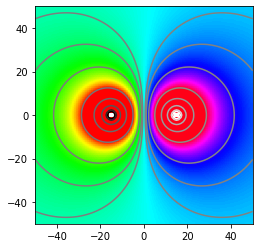

In [4]:
import numpy as np,matplotlib.pyplot as plt
from scipy.constants import epsilon_0 as e0
d = 30 #cm
#两个电荷的位置分别为
x1,y1=-d/2,0
x2,y2=d/2,0
q = 1
y,x = np.mgrid[-50:50:101j,-50:50:101j]
Phi = -1/np.sqrt((x-x1)**2+(y-y1)**2)+1/np.sqrt((x-x2)**2+(y-y2)**2)
#plt.imshow(Phi)
l = [i*0.001 for i in range(-300,300,5)] 
plt.imshow(Phi,extent=(-50,50,-50,50),vmax=0.05,vmin=-0.05,cmap='hsv')
plt.contour(x,y,Phi,levels=[-0.6,-0.4,-0.2,-0.1,-0.05,-0.02,-0.01,-0.005,0.005,0.01,0.02,0.05,0.1,0.2,0.4,0.6],cmap='gray')

2. 计算电势对$x,y$方向的偏导数, 得到其电势并可视化. 电场既有大小又有方向, 可以用两个强度图来表示, 一个表示大小, 一个表示方向. 后者用hsv的配色，这个配色遍历彩虹的所有颜色，但是起始和终止颜色都是红色，使得它适合用来表示方向.

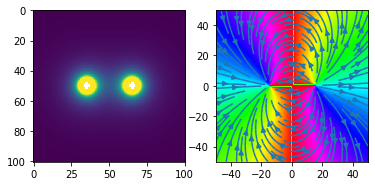

In [29]:
Ey,Ex=np.gradient(-Phi)
#plt.contour(x,y,Phi,levels=[-0.6,-0.4,-0.2,-0.1,-0.05,-0.02,-0.01,-0.005,-0.002,0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.4,0.6],cmap='gray')

E = np.hypot(Ex,Ey)
plt.subplot(1,2,1)
plt.imshow(E,vmax=0.03)
#plt.contourf(x,y,E,levels=[0.001,0.01,0.03,0.05,0.1,0.2,0.4,0.6,1])
plt.subplot(1,2,2)
Ev = np.arctan2(Ey,Ex)
plt.streamplot(x,y,Ex,Ey)
plt.imshow(Ev,cmap='hsv',extent=(-50,50,-50,50))

In [16]:
E.max(),E.min()

(inf, 0.00013604671081195012)

3. 现在假设电荷在$L\times L $方形区域内连续分布，电荷密度(单位 Cm$^{-2}$)
$$
\sigma(x,y) = q_0 \sin {2\pi x\over L} \sin{2\pi y\over L}.
$$
计算并可视化电场, 区域为$xy$平面上1平方米的方形区域, 积分步长为1 cm，$L=10$cm， 
电荷分布集中在绘图区域的中间, $q_0=100\,\textrm{Cm}^{-2}$. 你需要进行二重积分, 之后对电势微分以求得电场. 选择你认为合适的积分方法.

In [94]:
plt.imshow?

### Exercise 5.22

**Differentiating by integrating**

If you are familiar with the calculus of complex variables, you may
find the following technique useful and interesting.

Suppose we have a function $f(z)$ whose value we know not only on the real
line but also for complex values of its argument.  Then we can calculate
derivatives of that function at any point $z_0$ by performing a contour
integral, using the Cauchy derivative formula:
$$
\biggl( {d^m\!f\over d z^m} \biggr)_{z=z_0}
  = {m!\over2\pi i} \oint {f(z)\over(z-z_0)^{m+1}} d z,
$$
where the integral is performed counterclockwise around any contour in the
complex plane that surrounds the point $z_0$ but contains no poles
in $f(z)$.  Since numerical integration is significantly easier and more
accurate than numerical differentiation, this formula provides us with a
method for calculating derivatives---and especially multiple
derivatives---accurately by turning them into integrals.

Suppose, for example, that we want to calculate derivatives of $f(z)$ at
$z=0$.  Let us apply the Cauchy formula above using the trapezoidal rule to
calculate the integral along a circular contour centered on the origin with
radius 1.  The trapezoidal rule will be slightly different from the version
we are used to because the value of the interval $h$ is now a complex
number, and moreover is not constant from one slice of the integral to the
next---it stays constant in modulus, but its argument changes from one
slice to another.

We will divide our contour integral into $N$ slices with sample
points $z_k$ distributed uniformly around the circular contour at the
positions $z_k = e^{i 2\pi k/N}$ for $k=0\ldots N$.  Then the distance
between consecutive sample points is
$$
h_k = z_{k+1} - z_k = e^{ i  2\pi(k+1)/N} - e^{ i  2\pi k/N},
$$
and, introducing the shorthand $g(z)=f(z)/z^{m+1}$ for the integrand, the
trapezoidal rule approximation to the integral is
\begin{align*}
\oint g(z) d z
  &\simeq \sum_{k=0}^{N-1} \frac{1}{2} \bigl[ g(z_{k+1}) + g(z_k) \bigr]
          \bigl[ e^{ i  2\pi(k+1)/N} - e^{ i  2\pi k/N} \bigr] \\
  &= \frac{1}{2} \biggl[ \sum_{k=0}^{N-1} g(z_{k+1})\,e^{ i  2\pi(k+1)/N}
                   - \sum_{k=0}^{N-1} g(z_k)\,e^{ i  2\pi k/N} \\
  &\hspace{4em}{}  - \sum_{k=0}^{N-1} g(z_{k+1})\,e^{ i  2\pi k/N}
                   + \sum_{k=0}^{N-1} g(z_k)\,e^{ i  2\pi(k+1)/N}
           \biggr].
\end{align*}
Noting that $z_N=z_0$, the first two sums inside the brackets cancel each
other in their entirety, and the remaining two sums are equal except for
trivial phase factors, so the entire expression simplifies to
\begin{align*}
\oint g(z) d z
  &\simeq \frac{1}{2} \bigl[ e^{ i2\pi/N}-e^{- i2\pi/N} \bigr]
          \sum_{k=0}^{N-1} g(z_k)\,e^{ i2\pi k/N} \\
  &\simeq {2\pi i\over N} \sum_{k=0}^{N-1} f(z_k)\,e^{- i2\pi km/N},
\end{align*}
where we have used the definition of $g(z)$ again.  Combining this result
with the Cauchy formula, we then have
$$
\biggl( {d^m\!f\over d z^m} \biggr)_{z=0}
  \simeq {m!\over N} \sum_{k=0}^{N-1} f(z_k)\,e^{-i2\pi km/N}.
$$

Write a program to calculate the first twenty derivatives of $f(z)=e^{2z}$
at $z=0$ using this formula with $N=10000$.  You will need to use the
version of the \verb|exp| function from the \verb|cmath| package, which can
handle complex arguments.  You may also find the function \verb|factorial|
from the \verb|math| package useful; it calculates factorials of integer
arguments.

The correct value for the $m$th derivative in this case is easily shown to
be $2^m$, so it should be straightforward to tell if your program is
working---the results should be powers of two, 2, 4, 8, 16, 32, etc.  You
should find that it is possible to get reasonably accurate results for all
twenty derivatives rapidly using this technique.  If you use standard
difference formulas for the derivatives, on the other hand, you will find
that you can calculate only the first three or four derivatives accurately
before the numerical errors become so large that the results are useless.
In this case, therefore, the Cauchy formula gives the better results.

The sum $\sum_k f(z_k)\,e^{i2\pi km/N}$ that appears in the formula
above is known as the **discrete Fourier transform** of the complex
samples $f(z_k)$.  There exists an elegant technique for evaluating the
Fourier transform for many values of $m$ simultaneously, known as the
**fast Fourier transform**, which could be useful in cases where the
direct evaluation of the formula is slow.  We will study the fast Fourier
transform in detail in Chapter 7.

**通过积分求微分**

如果你熟悉复变函数积分, 你会发现下面的技术有用且有趣.

假设$f(z)$的参数有可能是复数. 那么我们可以用contour积分计算函数在$z_0$点的导数，采用柯西微分公式:
$$
\biggl( {d^m\!f\over d z^m} \biggr)_{z=z_0}
  = {m!\over2\pi i} \oint {f(z)\over(z-z_0)^{m+1}} d z,
$$
这里积分是沿着$z_0$周围的复平面上任意一条等值线进行且不包含$f(z)$的极点. 因为积分算法比微分算法更容易且更精确, 这个公式为我们提供了一种计算微分的方法---尤其是高价微分---通过将它们转化成积分.

例如, 设我们需要计算$f(z)$在$z=0$点的导数. 让我们采用柯西积分公式，用梯形积分法则来计算原点周围沿半径为1的等值线上的积分. 梯形积分算法和前面略有不同, 因为积分间隔$h$现在是复数, 此外从一个积分区间到下一个积分区间的也不再是常数, 它的模是常数但是参数在变化.

我们将等值线积分分成$N$个切片, 令样本点$z_k$均匀分布在等值线上 $z_k = e^{i 2\pi k/N}$， $k=0\ldots N$. 相邻样本点之间的距离为 
$$
h_k = z_{k+1} - z_k = e^{ i  2\pi(k+1)/N} - e^{ i  2\pi k/N},
$$
引入变量$g(z)=f(z)/z^{m+1}$代表被积函数, 积分的梯形积分法则为 
\begin{align*}
\oint g(z) d z
  &\simeq \sum_{k=0}^{N-1} \frac{1}{2} \bigl[ g(z_{k+1}) + g(z_k) \bigr]
          \bigl[ e^{ i  2\pi(k+1)/N} - e^{ i  2\pi k/N} \bigr] \\
  &= \frac{1}{2} \biggl[ \sum_{k=0}^{N-1} g(z_{k+1})\,e^{ i  2\pi(k+1)/N}
                   - \sum_{k=0}^{N-1} g(z_k)\,e^{ i  2\pi k/N} \\
  &\hspace{4em}{}  - \sum_{k=0}^{N-1} g(z_{k+1})\,e^{ i  2\pi k/N}
                   + \sum_{k=0}^{N-1} g(z_k)\,e^{ i  2\pi(k+1)/N}
           \biggr].
\end{align*}

由于$z_N=z_0$，所以在中括号中的前两个求和互相抵消，后面两个和在除了以下小的因子外相等, 所以整个表达式简化为
\begin{align*}
\oint g(z) d z
  &\simeq \frac{1}{2} \bigl[ e^{ i2\pi/N}-e^{- i2\pi/N} \bigr]
          \sum_{k=0}^{N-1} g(z_k)\,e^{ i2\pi k/N} \\
  &\simeq {2\pi i\over N} \sum_{k=0}^{N-1} f(z_k)\,e^{- i2\pi km/N},
\end{align*}
此处我们又一次使用了$g(z)$的定义. 将这个结果与柯西公式联合，得到
$$
\biggl( {d^m\!f\over d z^m} \biggr)_{z=0}
  \simeq {m!\over N} \sum_{k=0}^{N-1} f(z_k)\,e^{-i2\pi km/N}.
$$

写程序用这个公式计算$f(z)=e^{2z}$在$z=0$处的前20阶导数, $N=10000$.

这个函数的$m$阶导数的正确值是$2^m$，所以可以直接判断你的程序是否正确----答案应该是2的幂，2, 4, 8, 16, 32, 等. 采用这个技巧可以快速的获得较为精确的所有前20阶导数. 如果你使用前面我们所学的差分公式，则只有前面3到4阶的导数较为精确, 很快会由于误差过大而使计算结果没有意义. 在这种情况下, 柯西公式给出更好的结果.


公式中的$\sum_k f(z_k)\,e^{-i2\pi km/N}$ 也被称为复数样本$f(z_k)$的**离散傅里叶变换**. 可以用**快速傅里叶变换算法**快速且优雅的求出多个$m$的值. 我们将在后面的章节中学习快速傅里叶变换. 

### Exercise 5.23

**Image processing and the STM**

When light strikes a surface, the amount falling per unit area
depends not only on the intensity of the light, but also on the angle of
incidence.  If the light makes an angle $\theta$ to the normal, it only
''sees'' $\cos\theta$ of area per unit of actual area on the surface:

<img src="light.png" width=500>
So the intensity of illumination is $a\cos\theta$, if $a$ is the raw
intensity of the light.  This simple physical law is a central element of
3D computer graphics.  It allows us to calculate how light falls on
three-dimensional objects and hence how they will look when illuminated
from various angles.

Suppose, for instance, that we are looking down on the Earth from above and
we see mountains.  We know the height of the mountains $w(x,y)$ as a
function of position in the plane, so the equation for the Earth's
surface is simply $z=w(x,y)$, or equivalently $w(x,y)-z=0$, and the normal
vector $\vec{v}$ to the surface is given by the gradient of $w(x,y)-z$
thus:
$$
\vec{v} =
\nabla [w(x,y)-z] = \begin{pmatrix}
                  \partial/\partial x \\
                  \partial/\partial y \\
                  \partial/\partial z
                \end{pmatrix}
                [w(x,y)-z]
              = \begin{pmatrix}
                  \partial w/\partial x \\
                  \partial w/\partial y \\
                  -1
                \end{pmatrix}.
$$
Now suppose we have light coming in represented by a vector $\vec{a}$ with
magnitude equal to the intensity of the light.  Then the dot product of the
vectors $\vec{a}$ and $\vec{v}$ is
$$
\vec{a}\cdot\vec{v} = |\vec{a}|\,|\vec{v}|\cos\theta,
$$
where $\theta$ is the angle between the vectors.  Thus the intensity of
illumination of the surface of the mountains is
$$
I = |\vec{a}| \cos\theta = {\vec{a}\cdot\vec{v}\over|\vec{v}|}
  = {a_x (\partial w/\partial x)
   + a_y (\partial w/\partial y) - a_z\over
     \sqrt{(\partial w/\partial x)^2 + (\partial w/\partial y)^2 + 1}}.
$$
Let's take a simple case where the light is shining horizontally with unit
intensity, along a line an angle $\phi$ counter-clockwise from the
east-west axis, so that $\vec{a}=(\cos\phi,\sin\phi,0)$.  Then our
intensity of illumination simplifies to
$$
I = {\cos\phi\,(\partial w/\partial x) + \sin\phi\,(\partial w/\partial y)\over
     \sqrt{(\partial w/\partial x)^2 + (\partial w/\partial y)^2 + 1}}.
$$
If we can calculate the derivatives of the height $w(x,y)$ and we
know $\phi$ we can calculate the intensity at any point.


1. In the on-line resources you'll find a file called
  \verb|altitude.txt|, which contains the altitude $w(x,y)$ in meters above
  sea level (or depth below sea level) of the surface of the Earth,
  measured on a grid of points $(x,y)$.  Write a program that reads this
  file and stores the data in an array.  Then calculate the derivatives
  $\partial w/\partial x$ and $\partial w/\partial y$ at each grid point.
  Explain what method you used to calculate them and why.  (Hint: You'll
  probably have to use more than one method to get every grid point,
  because awkward things happen at the edges of the grid.)  To calculate
  the derivatives you'll need to know the value of $h$, the distance in
  meters between grid points, which is about $30\,000\,$m in this case.
  (It's actually not precisely constant because we are representing the
  spherical Earth on a flat map, but $h=30\,000\,$m will give reasonable
  results.)
2. Now, using your values for the derivatives, calculate the intensity
  for each grid point, with $\phi=45^\circ$, and make a density plot of the
  resulting values in which the brightness of each dot depends on the
  corresponding intensity value.  If you get it working right, the plot
  should look like a relief map of the world---you should be able to see
  the continents and mountain ranges in 3D.  (Common problems include a map
  that is upside-down or sideways, or a relief map that is ``inside-out,''
  meaning the high regions look low and \textit{vice versa}.  Work with the
  details of your program until you get a map that looks right to you.)
3. There is another file in the on-line resources called \verb|stm.txt|,
  which contains a grid of values from scanning tunneling microscope
  measurements of the (111) surface of silicon.  A scanning
  tunneling microscope (STM) is a device that measures the shape of
  surfaces at the atomic level by tracking a sharp tip over the surface and
  measuring quantum tunneling current as a function of position.  The end
  result is a grid of values that represent the height of the surface as a
  function of position and the data in the file \verb|stm.txt| contain just
  such a grid of values.  Modify the program you just wrote to visualize
  the STM data and hence create a 3D picture of what the silicon
  surface looks like.  The value of $h$ for the derivatives in this case is
  around $h=2.5$ (in arbitrary units).
 

### Exercise 5.23

**图像处理和STM**

当光束照射到一个物体表面时, 单位面积上的光强不仅依赖于入射光的强度, 也依赖于入射角度.
如果光和法方向的夹角是$\theta$，那么它仅"看到"物体表面单位真实面积的$\cos\theta$

<img src="light.png" width=500>

如果光的强度是$a$，则照明强度为 $a\cos\theta$. 这个简单的物理定律是3D计算机成图的一个核心元素. 它允许我们计算光如何落在3维物体表面，从不同入射角入射时物体的看起来时什么样子.

例如, 设我们从高空俯视地球，我们看到山脉. 我们知道山脉的高度是平面上位置的函数 $w(x,y)$, 所以地球表面的方程可以用简单的 $z=w(x,y)$表示, 或者等价的 $w(x,y)-z=0$, 表面的法方向$\vec{v}$ 由 $w(x,y)-z$的梯度给出, 因而:
$$
\vec{v} =
\nabla [w(x,y)-z] = \begin{pmatrix}
                  \partial/\partial x \\
                  \partial/\partial y \\
                  \partial/\partial z
                \end{pmatrix}
                [w(x,y)-z]
              = \begin{pmatrix}
                  \partial w/\partial x \\
                  \partial w/\partial y \\
                  -1
                \end{pmatrix}.
$$

现在我们假设入射光用向量$\vec{a}$表示, 向量的大小表示光强. 那么 $\vec{a}$ 和 $\vec{v}$ 的点积为
$$
\vec{a}\cdot\vec{v} = |\vec{a}|\,|\vec{v}|\cos\theta,
$$
这里$\theta$是向量之间的夹角. 因而山峰表面的照明强度为
$$
I = |\vec{a}| \cos\theta = {\vec{a}\cdot\vec{v}\over|\vec{v}|}
  = {a_x (\partial w/\partial x)
   + a_y (\partial w/\partial y) - a_z\over
     \sqrt{(\partial w/\partial x)^2 + (\partial w/\partial y)^2 + 1}}.
$$
假设一种简单的情况, 单位强度的入射光在水平方向, 沿着角度为$\phi$的线由东到西逆时针方向入射, 所以
 $\vec{a}=(\cos\phi,\sin\phi,0)$. 那么我们的照明强度简化为 
$$
I = {\cos\phi\,(\partial w/\partial x) + \sin\phi\,(\partial w/\partial y)\over
     \sqrt{(\partial w/\partial x)^2 + (\partial w/\partial y)^2 + 1}}.
$$
如果我们可以计算高度$w(x,y)$的导数且知道$\phi$，那就可以计算任意点的强度.

1. 你能找到一个文件altitude.txt, 它包括地球表面海拔高度的数据$w(x,y)$, 单位为米. 写程序读入数据并存入一个numpy数组. 之后计算每个栅格点的导数 $\partial w/\partial x$ and $\partial w/\partial y$. 解释你用的哪种方法并给出理由. (提示: 你可能需要用多种方法来获得每一个栅格点, 因为在栅格边界处会有些尴尬)，为解释导数，需要知道$h$，即栅格点之间的距离, 在本题中约为$30\,000\,$m.(实际上不是正好等于这个数, 因为我们用平面代表了地球表面, 但是这个数值可以给出一个合理的结果.)

2. 现在用你的导数值，计算每一个栅格点的强度, $\phi=45^\circ$, 将结果用强度图表示. 如果结果正确，那么它看起来像浮雕的世界地图---可以看到3D的大洲和山峰. (图的常见问题是上下颠倒或者侧着或者浮雕图上高的区域看起来是低的. 仔细调程序使图看起来正确.)

3. 另外有一个文件stm.txt, 它包含了扫描隧道显微镜对硅晶体表面的扫描成像. 扫描
  隧道显微镜（STM）是一种测量形状的设备
  通过跟踪表面上的尖锐尖端来在原子水平上显示表面，并且
  测量量子隧穿电流作为位置的函数. 数据stm.txt代表物体表面高度的二维数据. 修改程序可视化STM数据, 创建硅晶体表面的3D图像. 本例中的$h$约为$h=2.5$(任意单位).